# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

Импортируем библиотеку Пандас и загружаем данные из файла в датафрейм:

In [1]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv')

Далее для более полной информации посмотрим первые, последние и случайные 5 строк датафрейма:

In [3]:
display(df.head(5))

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...


Похоже, что все данные записаны в один столбец, значит, необходимо указать разделитель: 

In [4]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
display(df.head(5))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [5]:
display(df.tail(5))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.7,5.0,73.3,3,NaN,False,False,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,False,False,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.0,17.0,NaN,12,NaN,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.5,5.0,12.3,1,NaN,False,False,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
display(df.sample(5))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
6994,11,4500000.0,106.2,2017-11-03T00:00:00,5,NaN,5.0,67.5,3,NaN,False,False,8.5,NaN,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,242.0
18346,13,5300000.0,61.0,2016-06-03T00:00:00,2,NaN,8.0,32.0,1,NaN,False,False,8.0,1.0,Санкт-Петербург,24549.0,5117.0,1.0,392.0,0.0,NaN,60.0
7478,0,5800000.0,79.6,2018-10-06T00:00:00,3,2.80,24.0,49.0,3,NaN,False,False,9.0,1.0,посёлок Шушары,12648.0,18434.0,0.0,NaN,0.0,NaN,NaN
12793,20,4600000.0,45.7,2017-12-01T00:00:00,2,2.65,12.0,32.3,8,NaN,False,False,7.1,1.0,Санкт-Петербург,49525.0,15231.0,0.0,NaN,0.0,NaN,30.0
22187,14,3100000.0,39.0,2016-03-03T00:00:00,1,2.50,9.0,17.6,5,NaN,False,False,8.0,NaN,Санкт-Петербург,39650.0,12553.0,0.0,NaN,0.0,NaN,947.0


Посмотрим общую информацию о датафрейме:

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

У некоторых столбцов формат float64, хотя значения в них должны быть целочисленными и формат int64 (например, floors_total), это свзяано с тем, что в столбце есть пропуски NaN.
Подобная ситуация и is_apartment, кажется, там должен быть тип данных bool.
Столбец с датой выставления объекта в продажу в формате object немного смущает, пропусков в этом столбце нет, поэтому лучше его заменить на формат даты datetime. 


Также, стоит отметить, что не у всех столбцов понятные названия, лучше их переименовать для удобства и понимания. 

Посмотрим на значения:

In [8]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Сразу видны аномальные значения в столбцах с высотой потолков, жилой площадью и площадью кухни.  

Построим гистограмму для числовых столбцов таблицы:

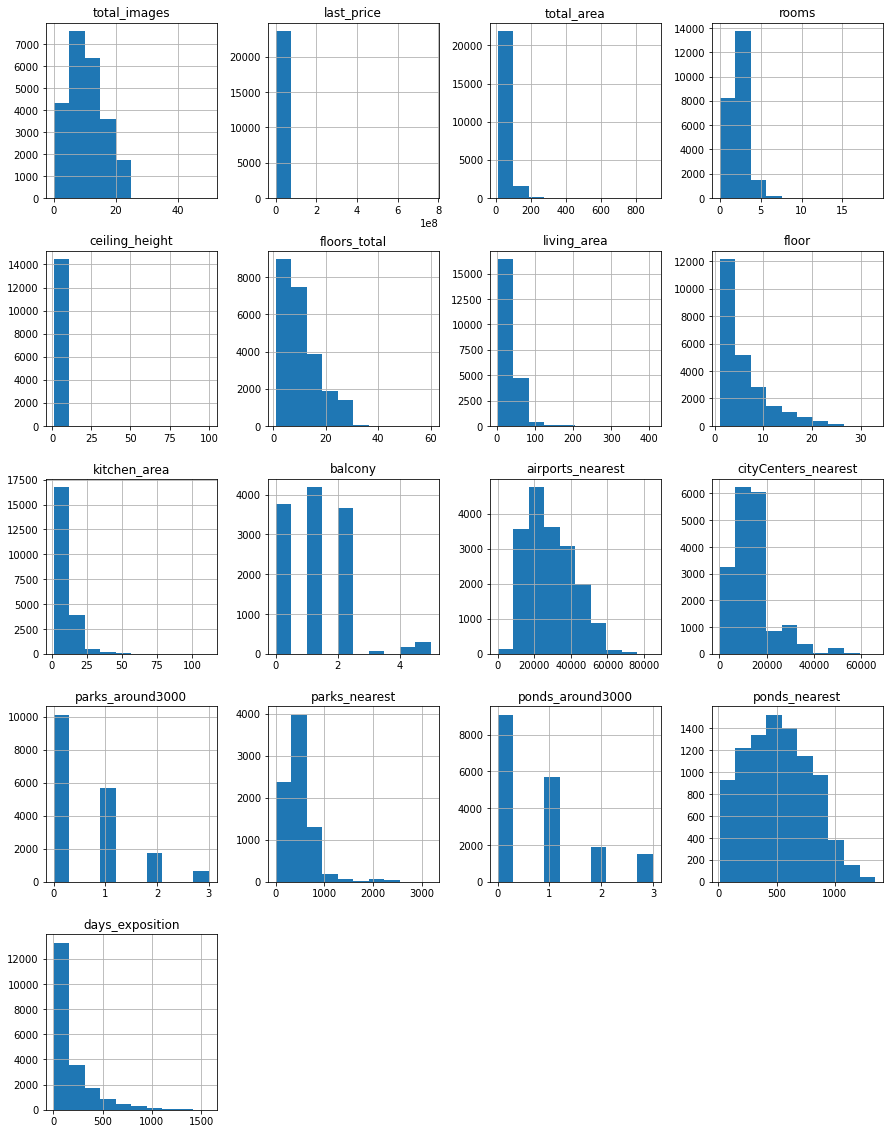

In [9]:
df.hist(figsize=(15, 20));

Проверим количество строк-дубликатов в данных:

In [10]:
df.duplicated().sum()

0

Полностью идентичных строк нет, но повторы возможны, если данные хотя бы одного из столбцов измнены (например, объявление повторно выложено в другое время или добавлены фото и проч.)

**Вывод**

Файл прочитан, всего в нем 23698 строк и 22 столбца. 

Не во всех столбцах есть данные по каждой строке (высота потолков, жилая площадь, наличие балконов и проч.), в названиях некоторых столбцов не соблюден "змеиный регистр", а также по самим названиям столбцов нет четкого понимания о содержащейся в них информации.

Необходимо более подробно изучить данные по пропускам и аномальным значениям, устранить явные и неявные дубли, изменить названия столбцов, изменить формат столбца с датой. 

### Предобработка данных

Переименуем некоторые столбцы:
- studio и open_plan принимают значения True или False, поэтому по аналогии с is_apartment переименуем их в is_studio и is_open_plan
- airports_nearest содержит информацию о расстояние до ближайшего аэропорта, поэтому переимуем в distance_to_airport
- cityCenters_nearest - расстояние до центра, поэтому по аналогии с аэропртами переименуем, заодно приведя к "змеиному регистру" в distance_to_center
- parks_around3000 -  количество парков в радиусе 3 км, в целом, понятно, поэтому просто добавим нижнее подчеркивание перед числом - parks_around_3000
- подобным образом переименуем и ponds_around3000 в ponds_around_3000
- parks_nearest и ponds_nearest переименуем в distance_to_park и distance_to_pond соответственно

In [11]:
df = df.rename(columns= {'studio' : 'is_studio',
                         'open_plan': 'is_open_plan',
                         'airports_nearest' : 'distance_to_airport',
                         'cityCenters_nearest' : 'distance_to_center',
                         'parks_around3000' : 'parks_around_3000',
                         'parks_nearest' : 'distance_to_park',
                         'ponds_around3000' : 'ponds_around_3000',
                         'ponds_nearest' : 'distance_to_pond'})
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,distance_to_airport,distance_to_center,parks_around_3000,distance_to_park,ponds_around_3000,distance_to_pond,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Изменим формат столбца first_day_exposition:

In [12]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format = '%Y-%m-%d')

Опрелелим суммарное количество пропусков в данных по столбцам:

In [13]:
df.isnull().sum().sort_values()

total_images                0
is_open_plan                0
floor                       0
rooms                       0
is_studio                   0
total_area                  0
last_price                  0
first_day_exposition        0
locality_name              49
floors_total               86
living_area              1903
kitchen_area             2278
days_exposition          3181
ponds_around_3000        5518
parks_around_3000        5518
distance_to_center       5519
distance_to_airport      5542
ceiling_height           9195
balcony                 11519
distance_to_pond        14589
distance_to_park        15620
is_apartment            20924
dtype: int64

Пропуски есть в столбцах: название населенного пункта(locality_name), всего этажей в доме (floors_total), жилая площадь (living_area), площадь кухни (kitchen_area), сколько дней было размещено объявление (days_exposition), число водоемов в радиусе 3 км (ponds_around_3000), число парков в радиусе 3 км (parks_around_3000), расстояние до центра города (distance_to_center), расстояние до ближайшего аэропорта (distance_to_airport), высота потолков (ceiling_height), число балконов (balcony), расстояние до ближайшего пруда (distance_to_pond), расстояние до ближайшего парка (distance_to_park), апартаменты (is_apartment). 

Из пропущенных значений можно допустить, что если нет информации о балконах, то их нет в квартире.
Поэтому заменим эти пропуски значением 0.

In [14]:
df['balcony'] = df['balcony'].fillna(0) 
df['balcony'] = df['balcony'].astype('int') #и сразу заменим тип данных на целочисленнный
# проверим, что вместо пропусков теперь 0
print (df['balcony'].head(10)) 
print (df['balcony'].tail(10))

0    0
1    2
2    0
3    0
4    0
5    0
6    1
7    2
8    0
9    2
Name: balcony, dtype: int64
23689    2
23690    0
23691    1
23692    0
23693    0
23694    0
23695    0
23696    0
23697    2
23698    0
Name: balcony, dtype: int64


Пропуски в остальных столбцах пока заменять не будем.
Пропуски, связанные с наличием прудов и парков, вероятно вызваны тем, что не многие сочли эту информацию важной, пропуски с высотой потолков и площадью, возможно, вызваны тем, что люди не знают данных или невнимательно заполнили объявление (что странно).  

Строки без указания населенного пункта очень влияют на результат исследования, поскольку это определяющий фактор при покупке/продаже квартиры, поэтому сразу удалим их.

In [15]:
df = df.dropna(subset=['locality_name'])
df['locality_name'].isna().sum()
print(df.loc[(df['locality_name'] == 'None') & (df['locality_name'] == '')]) #сразу проверим, что пропусков в столбце не осталось

Empty DataFrame
Columns: [total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floor, is_apartment, is_studio, is_open_plan, kitchen_area, balcony, locality_name, distance_to_airport, distance_to_center, parks_around_3000, distance_to_park, ponds_around_3000, distance_to_pond, days_exposition]
Index: []


Продолжим обрабатывать столбец с названиями населенных пунктов. 
Посмотрим количество упоминаний каждого:

In [16]:
print(df['locality_name'].value_counts())

Санкт-Петербург                          15721
посёлок Мурино                             522
посёлок Шушары                             440
Всеволожск                                 398
Пушкин                                     369
                                         ...  
поселок городского типа Большая Ижора        1
садовое товарищество Рахья                   1
поселок городского типа Рябово               1
деревня Пижма                                1
поселок станции Лужайка                      1
Name: locality_name, Length: 364, dtype: int64


Всего 364 населенных пункта в датафрейме.
Возможно в столбце есть повторы, связанные с написанием разным регистром, проверим:

In [17]:
df['locality_name'] = df['locality_name'].str.lower()
print(df['locality_name'].value_counts())

санкт-петербург           15721
посёлок мурино              522
посёлок шушары              440
всеволожск                  398
пушкин                      369
                          ...  
деревня нижние осельки        1
поселок лисий нос             1
деревня нижняя                1
поселок красносельское        1
деревня котлы                 1
Name: locality_name, Length: 364, dtype: int64


Повторов населенных пунктов с разным регистром нет.
Проверим повторы, связанные с написанием "ё", заменив все на "е":

In [18]:
df['locality_name'] = df['locality_name'].str.replace('ё','е', regex=True)
len(df['locality_name'].unique()) #сразу подсчитаем количество уникальных значений

330

Количество уникальных занчений в названии насленных пунктов снизилось с 364 до 330. 
Возможно также в столбце с указанием местоположения есть неявные дубликаты, связанные с разным обозначением одних и тех же населенных пунктов. 

In [19]:
df['locality_name'].unique()

array(['санкт-петербург', 'поселок шушары', 'городской поселок янино-1',
       'поселок парголово', 'поселок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок городского типа красный бор', 'гатчина',
       'деревня федоровское', 'выборг', 'кронштадт', 'кировск',
       'деревня новое девяткино', 'поселок металлострой',
       'поселок городского типа лебяжье',
       'поселок городского типа сиверский', 'поселок молодцово',
       'поселок городского типа кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'поселок аннино',
       'поселок городского типа ефимовский', 'поселок плодовое',
       'деревня заклинье', 'поселок торковичи', 'поселок первомайское',
       'красное село', 'поселок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', 'поселок новый свет

На глаз трудно что-то найти. Вероятно, если и есть повторы, то их незначительное количество. Попробуем избавиться от них. Допустим, что наименования "поселок городского типа" и "поселок" использованы для одного и того же населенного пункта.

In [20]:
df['locality_name'] = df['locality_name'].str.replace('поселок городского типа','поселок', regex=True)

In [21]:
df['locality_name'].unique()

array(['санкт-петербург', 'поселок шушары', 'городской поселок янино-1',
       'поселок парголово', 'поселок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок красный бор', 'гатчина', 'деревня федоровское', 'выборг',
       'кронштадт', 'кировск', 'деревня новое девяткино',
       'поселок металлострой', 'поселок лебяжье', 'поселок сиверский',
       'поселок молодцово', 'поселок кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'поселок аннино',
       'поселок ефимовский', 'поселок плодовое', 'деревня заклинье',
       'поселок торковичи', 'поселок первомайское', 'красное село',
       'поселок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', 'поселок новый свет', 'сланцы',
       'село путилово', 'ивангород', 'мурино', 'шлиссельбург',
       'никольское

In [22]:
len(df['locality_name'].unique())

329

Такой насленный пункт оказался всего один.
Также, судя по списку уникальных значений столбца, есть предположение, что "городской поселок" и "поселок" используются для одного и того же насленного пункта.

In [23]:
df['locality_name'] = df['locality_name'].str.replace('городской поселок','поселок', regex=True)

In [24]:
len(df['locality_name'].unique())

322

Неявные дубли удалили, оставим столбец locality name для дальнейшей работы в таком виде.

In [25]:
df.isnull().sum().sort_values()

total_images                0
locality_name               0
balcony                     0
is_open_plan                0
floor                       0
is_studio                   0
rooms                       0
first_day_exposition        0
total_area                  0
last_price                  0
floors_total               85
living_area              1898
kitchen_area             2269
days_exposition          3180
parks_around_3000        5510
ponds_around_3000        5510
distance_to_center       5511
distance_to_airport      5534
ceiling_height           9160
distance_to_pond        14565
distance_to_park        15586
is_apartment            20890
dtype: int64

Для замены остальных пропусков в столбцах у нас недостаточно информации.

Посмотрим еще на аномальные значения, которые были замечены в описании датафрейма.
Это столбцы с высотой потолка, общей и жилой площадью.

In [26]:
df['ceiling_height'].sort_values().unique()

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

In [27]:
df['ceiling_height'].describe()

count    14490.000000
mean         2.771287
std          1.261593
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Вероятно, в некоторых значениях потерялись запятые - 27.5, 32, 27, 26, 25. Изменим расположение запятой, чтобы получить значения ближе к корректным. 
Минимальной высотой потолка считается 2.4 м. Поэтому все, что ниже вызывает вопросы. Также, как и высота потолков выше 10 метров.
Предлагаю значения ниже 2.4 заменить на минимальную высоту - 2.4, высоту потолков выше 10 заменить на 10, а пропуски заменить на среднее значение 2.77.

In [28]:
df['ceiling_height'] = df['ceiling_height'].fillna(2.77)
df['ceiling_height'].isnull().sum() 

0

In [29]:
df.loc[(df['ceiling_height'] < 2.4), 'ceiling_height'] = 2.4
df.loc[(df['ceiling_height'] == 27.5), 'ceiling_height'] = 2.75
df.loc[(df['ceiling_height'] == 32), 'ceiling_height'] = 3.2
df.loc[(df['ceiling_height'] == 27), 'ceiling_height'] = 2.7
df.loc[(df['ceiling_height'] == 26), 'ceiling_height'] = 2.6
df.loc[(df['ceiling_height'] == 25), 'ceiling_height'] = 2.5
df.loc[(df['ceiling_height'] > 10), 'ceiling_height'] = 10 
df['ceiling_height'].sort_values().unique()

array([ 2.4 ,  2.45,  2.46,  2.47,  2.48,  2.49,  2.5 ,  2.51,  2.52,
        2.53,  2.54,  2.55,  2.56,  2.57,  2.58,  2.59,  2.6 ,  2.61,
        2.62,  2.63,  2.64,  2.65,  2.66,  2.67,  2.68,  2.69,  2.7 ,
        2.71,  2.72,  2.73,  2.74,  2.75,  2.76,  2.77,  2.78,  2.79,
        2.8 ,  2.81,  2.82,  2.83,  2.84,  2.85,  2.86,  2.87,  2.88,
        2.89,  2.9 ,  2.91,  2.92,  2.93,  2.94,  2.95,  2.96,  2.97,
        2.98,  2.99,  3.  ,  3.01,  3.02,  3.03,  3.04,  3.05,  3.06,
        3.07,  3.08,  3.09,  3.1 ,  3.11,  3.12,  3.13,  3.14,  3.15,
        3.16,  3.17,  3.18,  3.2 ,  3.21,  3.22,  3.23,  3.24,  3.25,
        3.26,  3.27,  3.28,  3.29,  3.3 ,  3.31,  3.32,  3.33,  3.34,
        3.35,  3.36,  3.37,  3.38,  3.39,  3.4 ,  3.42,  3.43,  3.44,
        3.45,  3.46,  3.47,  3.48,  3.49,  3.5 ,  3.51,  3.52,  3.53,
        3.54,  3.55,  3.56,  3.57,  3.58,  3.59,  3.6 ,  3.62,  3.63,
        3.65,  3.66,  3.67,  3.68,  3.69,  3.7 ,  3.75,  3.76,  3.78,
        3.8 ,  3.82,

In [30]:
df['ceiling_height'].describe()

count    23650.000000
mean         2.746260
std          0.256592
min          2.400000
25%          2.600000
50%          2.770000
75%          2.770000
max         10.000000
Name: ceiling_height, dtype: float64

Остваим столбец с высотой потолков в таком виде.

Теперь посмотрим на жилую и общую площадь.
Согласно Своду правил СП 54.13330.2016 "Здания жилые многоквартирные", общая площадь не должна быть менее 24 квадратных метров, а жилая - менее 14 кваратных метров. 

In [31]:
df.loc[(df['total_area'] < 24), 'total_area']

114      21.40
545      23.80
716      17.00
946      23.00
1194     22.70
         ...  
22384    22.23
22521    23.39
22680    23.60
23191    18.90
23673    23.00
Name: total_area, Length: 132, dtype: float64

In [32]:
df.loc[(df['living_area'] < 14), 'living_area']

6        10.60
101      12.00
114       8.30
248      10.00
352      13.00
         ...  
23481    10.08
23573    13.59
23574     3.00
23673    12.60
23698    12.30
Name: living_area, Length: 321, dtype: float64

Такие значения есть в нашем датафрейме, возможно они связаны друг с другом, а также с тем, что в датафрейме есть студии и апартаменты, на которые стандарты не распространяются.

In [33]:
df.query('living_area < 14 & is_studio == True')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,distance_to_airport,distance_to_center,parks_around_3000,distance_to_park,ponds_around_3000,distance_to_pond,days_exposition
716,5,1500000.0,17.00,2017-06-07,0,2.70,9.0,12.00,1,NaN,True,False,NaN,0,поселок шушары,18654.0,29846.0,0.0,NaN,0.0,NaN,40.0
5855,3,945750.0,19.50,2017-09-18,0,2.76,3.0,12.70,2,False,True,False,NaN,0,поселок дубровка,NaN,NaN,NaN,NaN,NaN,NaN,3.0
8886,10,2450000.0,15.50,2018-08-22,0,2.77,5.0,10.00,2,NaN,True,False,NaN,0,санкт-петербург,24326.0,4589.0,0.0,NaN,1.0,446.0,27.0
12280,10,2200000.0,21.00,2016-04-02,0,2.60,16.0,13.00,10,NaN,True,False,NaN,1,санкт-петербург,12918.0,15509.0,0.0,NaN,0.0,NaN,931.0
15109,4,2320000.0,24.40,2018-01-01,0,2.74,24.0,13.56,6,NaN,True,False,NaN,2,поселок мурино,NaN,NaN,NaN,NaN,NaN,NaN,5.0
17582,11,2680000.0,22.00,2018-08-11,0,2.77,25.0,5.00,8,NaN,True,False,NaN,2,санкт-петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,70.0
20086,0,1550000.0,22.00,2016-05-11,1,2.70,15.0,10.94,14,False,True,False,NaN,2,никольское,NaN,NaN,NaN,NaN,NaN,NaN,45.0
21758,0,2330000.0,23.00,2018-01-01,0,2.77,24.0,2.00,22,NaN,True,False,NaN,0,поселок мурино,NaN,NaN,NaN,NaN,NaN,NaN,66.0
22521,5,2350000.0,23.39,2018-08-28,0,2.77,17.0,13.54,13,NaN,True,False,NaN,0,поселок мурино,NaN,NaN,NaN,NaN,NaN,NaN,49.0


In [34]:
df.query('living_area < 14 & is_apartment == True')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,distance_to_airport,distance_to_center,parks_around_3000,distance_to_park,ponds_around_3000,distance_to_pond,days_exposition
7362,18,4300000.0,41.76,2018-06-12,1,2.65,20.0,13.92,6,True,False,False,11.37,2,санкт-петербург,39141.0,15985.0,0.0,NaN,0.0,NaN,44.0


In [35]:
df.query('living_area < 14 & total_area < 24')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,distance_to_airport,distance_to_center,parks_around_3000,distance_to_park,ponds_around_3000,distance_to_pond,days_exposition
114,5,4000000.0,21.40,2019-02-07,1,2.90,8.0,8.30,7,NaN,False,False,6.3,0,санкт-петербург,27089.0,5791.0,2.0,488.0,1.0,286.0,NaN
716,5,1500000.0,17.00,2017-06-07,0,2.70,9.0,12.00,1,NaN,True,False,NaN,0,поселок шушары,18654.0,29846.0,0.0,NaN,0.0,NaN,40.0
1194,14,2520000.0,22.70,2018-08-31,1,2.77,14.0,13.50,5,NaN,False,False,NaN,0,санкт-петербург,22735.0,11907.0,1.0,1065.0,1.0,484.0,7.0
1588,3,1900000.0,21.89,2018-11-01,1,2.77,19.0,10.93,17,NaN,False,False,NaN,0,поселок бугры,NaN,NaN,NaN,NaN,NaN,NaN,22.0
1625,7,1980000.0,23.98,2018-02-01,0,2.77,4.0,10.50,3,NaN,False,True,NaN,1,поселок станции корнево,NaN,NaN,NaN,NaN,NaN,NaN,120.0
1816,3,1650000.0,22.00,2016-09-19,1,2.77,18.0,10.00,15,NaN,False,False,NaN,0,никольское,NaN,NaN,NaN,NaN,NaN,NaN,274.0
2461,7,1750000.0,21.10,2018-10-15,1,2.50,5.0,11.40,2,NaN,False,False,5.2,1,поселок ильичево,NaN,NaN,NaN,NaN,NaN,NaN,92.0
2775,12,2450000.0,22.70,2018-01-10,1,2.77,10.0,13.80,5,NaN,False,False,NaN,0,санкт-петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,89.0
4077,10,3000000.0,20.00,2017-04-10,2,2.77,6.0,13.00,2,NaN,False,False,5.6,0,санкт-петербург,28450.0,6996.0,2.0,223.0,1.0,611.0,16.0
4463,8,3250000.0,23.50,2018-03-23,1,2.55,16.0,10.90,5,False,False,False,5.8,1,санкт-петербург,36652.0,15131.0,0.0,NaN,2.0,901.0,35.0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  float64       
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        23650 non-null  float64       
 6   floors_total          23565 non-null  float64       
 7   living_area           21752 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          2760 non-null   object        
 10  is_studio             23650 non-null  bool          
 11  is_open_plan          23650 non-null  bool          
 12  kitchen_area          21381 non-null  float64       
 13  balcony         

Из сводных таблиц видно, что лишь малая часть квартир/помещений с жилой площадью являются апартаментами или студиями. Более того, всего в  35 случаях маленькая жилая площадь и маленькая общая площадь связаны. Трудно предположить, с чем это может быть вызвано.

Поскольку в реальной жизни достаточно много объявлений о продаже совсем небольших студий в 18-20 квадтратных метров, то исключать варианты с площадью менее 24 квадратов явно не стоит. 
Предлагаю рассматривать в качестве аномалий обьъекты с общей площадью менее 16 квадратных метров и с жилой площадью менее 8 квадратных метров. 
По кухне очень сложно судить, поскольку ее площадь в студиях также может быть очень мала и ничем не регламенитироваться, поэтому столбец с площадью кухни оставим без изменений. 

Для начала, посмотрим сколько объявлений о продаже с общей площадью объектов менее 16 квадратов.

In [37]:
df[df['total_area'] < 16]['total_area'].count()

9

Некритичное значение, можем их удалить.

In [38]:
df = df[df['total_area'] >= 16]

In [39]:
df['total_area'].describe()

count    23641.000000
mean        60.346804
std         35.657001
min         16.000000
25%         40.000000
50%         52.000000
75%         69.740000
max        900.000000
Name: total_area, dtype: float64

Также посмотрим сколько объявлений о продаже с жилой площадью менее 8 квадратных метров.

In [40]:
df[df['living_area'] < 8]['living_area'].count()

8

In [41]:
df = df[df['living_area'] >= 8]

In [42]:
df['living_area'].describe()

count    21740.000000
mean        34.463971
std         22.033588
min          8.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

Посмотрим на квартиры с большой площадью, более 200 квадратных метров:

In [43]:
df[df['total_area'] > 200].describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,distance_to_airport,distance_to_center,parks_around_3000,distance_to_park,ponds_around_3000,distance_to_pond,days_exposition
count,199.000000,1.990000e+02,199.000000,199.000000,199.000000,198.000000,199.000000,199.000000,189.000000,199.000000,194.000000,197.000000,197.00000,134.000000,197.000000,145.000000,156.000000
mean,12.402010,5.979698e+07,278.596734,5.934673,3.200452,6.328283,165.196935,4.894472,30.191799,0.391960,26247.922680,7125.005076,1.28934,431.798507,1.375635,404.724138,321.955128
std,6.630142,7.685036e+07,92.032953,2.229452,0.521712,3.596150,56.482529,3.785128,17.166907,0.833113,7662.201812,6758.609379,1.11691,306.004761,1.102416,257.406415,322.376945
min,0.000000,1.194000e+07,200.300000,3.000000,2.500000,2.000000,55.000000,1.000000,10.000000,0.000000,10328.000000,436.000000,0.00000,21.000000,0.000000,16.000000,7.000000
25%,7.000000,2.395000e+07,222.000000,5.000000,2.770000,5.000000,133.500000,3.000000,19.500000,0.000000,22008.000000,3639.000000,0.00000,245.000000,0.000000,198.000000,90.000000
50%,12.000000,3.500000e+07,249.700000,6.000000,3.080000,5.000000,159.500000,4.000000,26.000000,0.000000,24737.500000,5162.000000,1.00000,396.500000,1.000000,368.000000,209.000000
75%,20.000000,6.728550e+07,298.750000,7.000000,3.500000,7.000000,182.900000,5.000000,35.000000,1.000000,27118.500000,7251.000000,2.00000,566.500000,2.000000,594.000000,464.750000
max,25.000000,7.630000e+08,900.000000,19.000000,5.300000,25.000000,409.700000,25.000000,112.000000,5.000000,56588.000000,34132.000000,3.00000,2218.000000,3.000000,1009.000000,1441.000000


Каких-то аномалий незаметно. Это все огромные дорогие квартиры от трех комнат и более. Оставим данные.

Рассмотрим столбец с ценой жилья.

In [44]:
df['last_price'].describe()

count    2.174000e+04
mean     6.500105e+06
std      1.087148e+07
min      1.219000e+04
25%      3.450000e+06
50%      4.650000e+06
75%      6.750000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Минимальное значение выглядит подозрительно. Вряд ли квартира даже в далеком уголке Ленинградской области может стоить менее  0,5 млн. рублей.

In [45]:
df[df['last_price'] < 500000]['last_price'].count()

9

In [46]:
df[df['last_price'] < 500000]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,distance_to_airport,distance_to_center,parks_around_3000,distance_to_park,ponds_around_3000,distance_to_pond,days_exposition
5698,7,450000.0,42.0,2017-07-31,2,2.77,1.0,23.0,1,NaN,False,False,5.8,0,поселок будогощь,NaN,NaN,NaN,NaN,NaN,NaN,233.0
8793,7,12190.0,109.0,2019-03-20,2,2.75,25.0,32.0,25,NaN,False,False,40.5,0,санкт-петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0
9581,7,450000.0,43.4,2018-08-31,2,2.77,5.0,30.3,3,NaN,False,False,5.5,0,деревня старополье,NaN,NaN,NaN,NaN,NaN,NaN,96.0
10782,3,490000.0,29.1,2016-05-05,1,2.50,5.0,17.0,5,NaN,False,False,5.5,0,сланцы,NaN,NaN,NaN,NaN,NaN,NaN,719.0
16032,8,480000.0,32.0,2019-01-06,1,2.77,2.0,16.0,1,NaN,False,False,NaN,0,сланцы,NaN,NaN,NaN,NaN,NaN,NaN,83.0
17456,7,430000.0,30.4,2019-04-22,1,2.77,2.0,16.0,1,NaN,False,False,6.0,0,сланцы,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17676,0,450000.0,36.5,2018-02-01,1,2.77,5.0,17.3,4,NaN,False,False,8.5,1,деревня ям-тесово,NaN,NaN,NaN,NaN,NaN,NaN,120.0
18867,1,470000.0,41.0,2018-02-11,1,2.77,5.0,32.0,3,NaN,False,False,9.0,0,деревня выскатка,NaN,NaN,NaN,NaN,NaN,NaN,46.0
23484,11,470000.0,44.5,2018-07-02,2,2.77,2.0,28.0,2,NaN,False,False,7.5,0,сланцы,NaN,NaN,NaN,NaN,NaN,NaN,298.0


Видно, что сюда попала квартира из Санкт-Петербурга. Скорее всего, цену указали в тысячах рублей. 
Заменим:

In [47]:
df['last_price'] = df['last_price'].replace(12190, 12190000)

Теперь посмотрим на дорогие квартиры, стоимостью выше 100 млн. рублей.

In [48]:
df[df['last_price'] > 100000000]['last_price'].count()

32

In [49]:
df[df['last_price'] > 100000000]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,distance_to_airport,distance_to_center,parks_around_3000,distance_to_park,ponds_around_3000,distance_to_pond,days_exposition
793,20,135000000.0,310.0,2018-05-22,4,3.30,5.0,250.00,2,NaN,False,False,50.00,0,санкт-петербург,34159.0,7251.0,2.0,295.0,3.0,190.0,342.0
1026,20,155000000.0,310.0,2018-10-12,5,5.30,3.0,190.00,3,NaN,False,False,63.00,2,санкт-петербург,24899.0,4785.0,0.0,NaN,1.0,603.0,NaN
1188,20,118000000.0,290.6,2018-06-01,6,3.82,6.0,188.70,3,NaN,False,False,22.00,1,санкт-петербург,25309.0,6224.0,1.0,217.0,0.0,NaN,316.0
1300,14,120000000.0,280.0,2018-07-12,5,4.70,4.0,162.00,3,NaN,False,False,30.00,0,санкт-петербург,24680.0,4247.0,1.0,464.0,3.0,339.0,225.0
1436,19,330000000.0,190.0,2018-04-04,3,3.50,7.0,95.00,5,NaN,False,False,40.00,0,санкт-петербург,23011.0,1197.0,3.0,519.0,3.0,285.0,233.0
1928,11,125000000.0,224.5,2017-01-24,4,2.77,4.0,163.50,3,False,False,False,30.00,1,санкт-петербург,22805.0,2335.0,0.0,NaN,2.0,497.0,174.0
2536,16,159984000.0,242.4,2015-08-27,4,3.85,9.0,131.00,7,NaN,False,False,20.00,0,санкт-петербург,21946.0,2242.0,1.0,679.0,1.0,227.0,501.0
4996,20,124000000.0,124.5,2017-10-12,4,3.00,4.0,67.20,2,False,False,False,20.00,0,санкт-петербург,20399.0,1722.0,3.0,302.0,3.0,172.0,45.0
7543,20,130000000.0,307.8,2016-04-24,5,2.77,4.0,187.90,3,NaN,False,False,63.40,0,санкт-петербург,24899.0,4785.0,0.0,NaN,1.0,603.0,1094.0
7674,20,131000000.0,380.0,2016-09-23,5,3.90,6.0,150.00,4,False,False,False,NaN,1,санкт-петербург,25801.0,4504.0,2.0,161.0,1.0,635.0,901.0


Выглядит правдоподобно. Оставляем.

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21740 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          21740 non-null  int64         
 1   last_price            21740 non-null  float64       
 2   total_area            21740 non-null  float64       
 3   first_day_exposition  21740 non-null  datetime64[ns]
 4   rooms                 21740 non-null  int64         
 5   ceiling_height        21740 non-null  float64       
 6   floors_total          21688 non-null  float64       
 7   living_area           21740 non-null  float64       
 8   floor                 21740 non-null  int64         
 9   is_apartment          2642 non-null   object        
 10  is_studio             21740 non-null  bool          
 11  is_open_plan          21740 non-null  bool          
 12  kitchen_area          20936 non-null  float64       
 13  balcony         

**Вывод**

Мы осуществили предобработку данных: 
- изменили названия нескольких столбцов, 
- заполнили пропуски в столбце с указанием количества балконов на 0, 
- изменили формат столбца balcony на целочисленный, а столбца first_day_exposition - на формат даты,
- удалили строки, в которых не указан населенный пункт, где расположено жилье,
- рассмотрели столбец с указанием высоты потолков и заменили аномальные значения,
- рассмотрели аномальные значения в столбцах с общей и жилой площадью, удалили аномально низкие значения, к аномально высоким вопросов не возникло, поэтому оставили их в нашем датафрейме,
- рассмотрели аномальные значения в столбце с ценой, исправили значение цены на более корректное.

### Посчитайте и добавьте в таблицу новые столбцы

Добавим новые столбцы:
- цена одного квадратного метра;
- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- месяц публикации объявления;
- год публикации объявления;
- тип этажа квартиры (значения — «‎первый», «последний», «другой»);
- расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

In [51]:
df['price_per_square'] = df['last_price'] / df['total_area'] #цена одного квадратного метра
df['public_day_week'] = df['first_day_exposition'].dt.weekday
df['public_month'] = df['first_day_exposition'].dt.month
df['public_year'] = df['first_day_exposition'].dt.year #день, месяц и год публикации объявления

df.head(10)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,distance_to_airport,distance_to_center,parks_around_3000,distance_to_park,ponds_around_3000,distance_to_pond,days_exposition,price_per_square,public_day_week,public_month,public_year
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,NaN,False,False,25.00,0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,3,3,2019
1,7,3350000.0,40.40,2018-12-04,1,2.77,11.0,18.60,1,NaN,False,False,11.00,2,поселок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,1,12,2018
2,10,5196000.0,56.00,2015-08-20,2,2.77,5.0,34.30,4,NaN,False,False,8.30,0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8,2015
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,NaN,False,False,41.00,0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6,2018
5,10,2890000.0,30.40,2018-09-10,1,2.77,12.0,14.40,5,NaN,False,False,9.10,0,поселок янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95065.789474,0,9,2018
6,6,3700000.0,37.30,2017-11-02,1,2.77,26.0,10.60,6,NaN,False,False,14.40,1,поселок парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,99195.710456,3,11,2017
8,20,2900000.0,33.16,2018-05-23,1,2.77,27.0,15.43,26,NaN,False,False,8.81,0,поселок мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,87454.764777,2,5,2018
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2,санкт-петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,88524.590164,6,2,2017
10,5,5050000.0,39.60,2017-11-16,1,2.67,12.0,20.30,3,NaN,False,False,8.50,0,санкт-петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0,127525.252525,3,11,2017
11,9,3300000.0,44.00,2018-08-27,2,2.77,5.0,31.00,4,False,False,False,6.00,1,ломоносов,48252.0,51677.0,0.0,NaN,0.0,NaN,7.0,75000.000000,0,8,2018


In [52]:
# добавим столбец с типом этажа с помощью функции
def floor_type(floor):
    if floor['floor'] == 1:
        return 'первый'
    elif floor['floor'] == floor['floors_total']:
        return 'последний'
    else: 
        return 'другой'

df['floor_type'] = df.apply(floor_type, axis = 1)

df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,distance_to_airport,distance_to_center,parks_around_3000,distance_to_park,ponds_around_3000,distance_to_pond,days_exposition,price_per_square,public_day_week,public_month,public_year,floor_type
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,NaN,False,False,25.00,0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,другой
1,7,3350000.0,40.40,2018-12-04,1,2.77,11.0,18.60,1,NaN,False,False,11.00,2,поселок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,1,12,2018,первый
2,10,5196000.0,56.00,2015-08-20,2,2.77,5.0,34.30,4,NaN,False,False,8.30,0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,другой
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,NaN,False,False,41.00,0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,другой
5,10,2890000.0,30.40,2018-09-10,1,2.77,12.0,14.40,5,NaN,False,False,9.10,0,поселок янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95065.789474,0,9,2018,другой
6,6,3700000.0,37.30,2017-11-02,1,2.77,26.0,10.60,6,NaN,False,False,14.40,1,поселок парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,99195.710456,3,11,2017,другой
8,20,2900000.0,33.16,2018-05-23,1,2.77,27.0,15.43,26,NaN,False,False,8.81,0,поселок мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,87454.764777,2,5,2018,другой
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2,санкт-петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,88524.590164,6,2,2017,другой
10,5,5050000.0,39.60,2017-11-16,1,2.67,12.0,20.30,3,NaN,False,False,8.50,0,санкт-петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0,127525.252525,3,11,2017,другой
11,9,3300000.0,44.00,2018-08-27,2,2.77,5.0,31.00,4,False,False,False,6.00,1,ломоносов,48252.0,51677.0,0.0,NaN,0.0,NaN,7.0,75000.000000,0,8,2018,другой


In [53]:
# создадим новый столбец с расстоянием до центра в км, округлив значения до целых
df['distance_to_center_km'] = (df['distance_to_center']/1000).round(0)
print(df['distance_to_center_km'].head(10))

0     16.0
1     19.0
2     14.0
4      8.0
5      NaN
6     19.0
8      NaN
9     15.0
10    14.0
11    52.0
Name: distance_to_center_km, dtype: float64


**Вывод**

Необходимые в шаге 3 столбцы посчитаны и добавлены. Они могут пригодиться далее на следющем шаге при проведении исследовательского анализа данных. Двигаемся дальше.

### Проведите исследовательский анализ данных

**4.1. Изучение параметров объектов**

Итак, на первом этапе изучим основные параметры объектов: общая площадь; жилая площадь; площадь кухни; цена объекта; количество комнат; высота потолков; этаж квартиры; тип этажа квартиры («первый», «последний», «другой»); общее количество этажей в доме; расстояние до центра города в метрах; расстояние до ближайшего аэропорта; расстояние до ближайшего парка; день и месяц публикации объявления.

45.0    382
42.0    340
60.0    315
31.0    310
44.0    308
40.0    283
43.0    275
32.0    274
50.0    263
36.0    255
Name: total_area, dtype: int64
count    21740.000000
mean        60.085194
std         34.708844
min         16.000000
25%         40.000000
50%         52.000000
75%         69.500000
max        900.000000
Name: total_area, dtype: float64


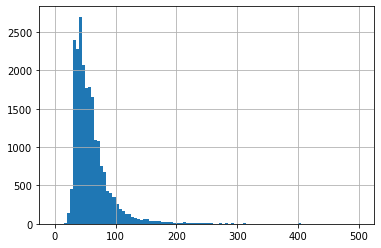

In [54]:
df['total_area'].hist(bins=100, range = (0, 500))
print(df['total_area'].value_counts().head(10))
print(df['total_area'].describe())

Есть выбросы данных, но еще на предыдущем этапе мы не смогли понять с чем они связаны. Само распределение похоже на распределение Пуассона с пиком в районе 40-70 квадратных метром. 

18.0    882
17.0    674
30.0    598
16.0    485
20.0    479
28.0    422
31.0    381
19.0    329
32.0    319
29.0    318
Name: living_area, dtype: int64
count    21740.000000
mean        34.463971
std         22.033588
min          8.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64


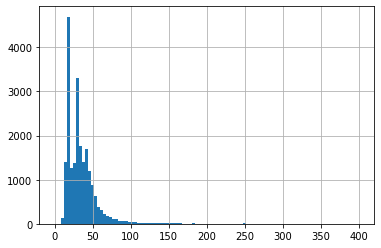

In [55]:
df['living_area'].hist(bins=100, range = (0, 400))
print(df['living_area'].value_counts().head(10))
print(df['living_area'].describe())

По аналогии с общей площадью, есть выбросы данных, но еще на предыдущем этапе мы не смогли понять с чем они связаны. Само распределение похоже на распределение Пуассона с двумя ярковыраженными пиками в районе 16-20 квадратов и 28-32 квадрата. Очевидно, это связано с тем, что в продаже больше всего одно- и двухкомнатных квартира со стандартной планировкой и площадью. Это видно и по самым популярным значениям общей площади, где в топ-10 были значения 31-32 квадрата и значения 40-46 квадратов.  

6.0     1273
10.0    1237
8.0     1096
9.0     1079
7.0     1049
11.0     789
12.0     642
8.5      411
5.5      397
14.0     367
Name: kitchen_area, dtype: int64
count    20936.000000
mean        10.514456
std          5.843371
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64


<AxesSubplot:>

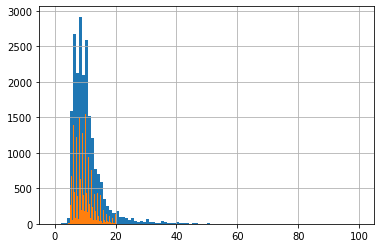

In [56]:
df['kitchen_area'].hist(bins=100, range = (0, 100))
print(df['kitchen_area'].value_counts().head(10))
print(df['kitchen_area'].describe())
df['kitchen_area'].hist(bins=100, range = (0, 20))

Площадь кухни соответсвует распределению Пуассона. Виден пик то 5,5 до 14 квадратов, что также можно объяснить типовой застройкой и стандартным размером кухни.

4500000.0    316
3500000.0    264
4200000.0    247
4300000.0    243
3600000.0    241
4000000.0    240
3800000.0    226
3300000.0    225
3200000.0    222
4100000.0    217
Name: last_price, dtype: int64
count    2.174000e+04
mean     6.500666e+06
std      1.087146e+07
min      4.300000e+05
25%      3.450000e+06
50%      4.650000e+06
75%      6.750000e+06
max      7.630000e+08
Name: last_price, dtype: float64


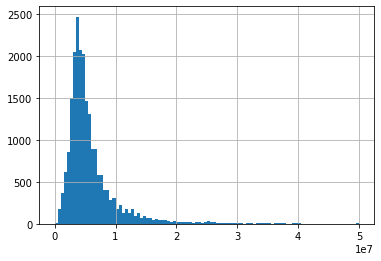

In [57]:
df['last_price'].hist(bins=100, range = (0, 50000000))
print(df['last_price'].value_counts().head(10))
print(df['last_price'].describe())

Распределение Пуассона. Основной пик в районе 3,5 - 4,5 млн рублей. Кажется, вполне адекватная цена для квартир в Санкт_Петербурге и пригородах, откуда явно большая часть квартир в объявлениях. 

1    7372
2    7281
3    5350
4    1083
5     292
0     180
6      99
7      53
8      12
9       7
Name: rooms, dtype: int64
count    21740.000000
mean         2.071849
std          1.080285
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


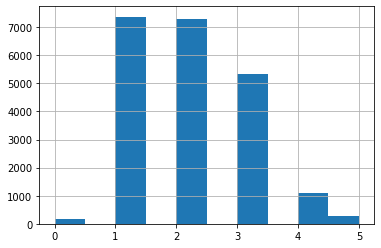

In [58]:
df['rooms'].hist(bins=10, range = (0, 5))
print(df['rooms'].value_counts().head(10))
print(df['rooms'].describe())

Также видим, что в данных есть квартиры с количеством комнат 0 и 19. Но это не сильно влияет на общую выборку, поэтому оставляе такие значения. Можно было бы дальнейшем уточнить у сотрудников, которые предоставили выгрузку, инфорацию по таким аномальным значениям.
Большшинство квартир однокомнатные, также большое двух- и трехкомнатных. Предположение о пиках в площадях квартир, тем самым, подвтерждаются. 

2.77    8112
2.50    3310
2.60    1562
2.70    1494
3.00    1019
2.80     938
2.55     937
2.75     867
2.65     640
3.20     264
Name: ceiling_height, dtype: int64
count    21740.000000
mean         2.745210
std          0.260646
min          2.400000
25%          2.600000
50%          2.770000
75%          2.770000
max         10.000000
Name: ceiling_height, dtype: float64


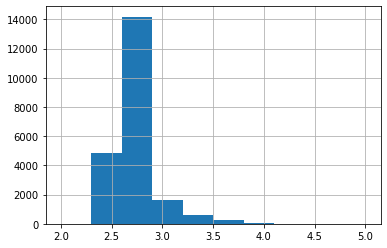

In [59]:
df['ceiling_height'].hist(bins=10, range = (2, 5))
print(df['ceiling_height'].value_counts().head(10))
print(df['ceiling_height'].describe())

Значения этого столбца мы немного изменили еще н этапе предобработки данных. Пик высоты потолков от 2.5 до 3 метров. 

2     3058
3     2830
1     2657
4     2596
5     2406
6     1199
7     1129
8     1004
9      972
10     629
Name: floor, dtype: int64
count    21740.000000
mean         5.889696
std          4.864139
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64


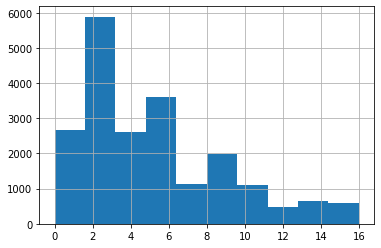

In [60]:
df['floor'].hist(bins=10, range = (0, 16))
print(df['floor'].value_counts().head(10))
print(df['floor'].describe())

Самое большое количество квартир продается на 2 этаже. Также в пике распределения 1, 3, 4 и 5 этажи. Что легкообъяснимо, ведь эти этажи есть во всех типов домов - от пятиэтажных хрущевок до 30-титажных новостроек.

другой       16008
последний     3075
первый        2657
Name: floor_type, dtype: int64


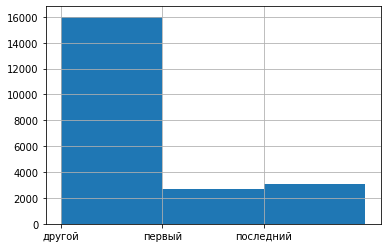

In [61]:
df['floor_type'].hist(bins=3, range = (0, 3))
print(df['floor_type'].value_counts())


Больше всего объявлений о продажах квартир не на первом и не на последнем этажах.

5.0     5300
9.0     3540
16.0    1268
12.0    1268
10.0    1080
4.0     1072
25.0     967
6.0      858
17.0     776
3.0      610
Name: floors_total, dtype: int64
count    21688.000000
mean        10.647685
std          6.565998
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64


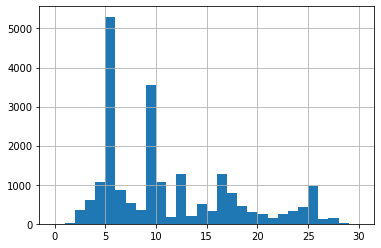

In [62]:
df['floors_total'].hist(bins=30, range = (0, 30))
print(df['floors_total'].value_counts().head(10))
print(df['floors_total'].describe())

Больше всего объявление о квартирах, которые находятся в пятиэтажках, на втором месте - девятиэтажки. 
Немного удивительно, посколько лично мне казалось, что девятиэтажек у нас в стране больше, да и квартир в каждой девятиэтажке больше. 

8460.0     56
10720.0    29
8434.0     27
20444.0    26
10364.0    23
13845.0    23
13056.0    22
16921.0    21
10337.0    21
17121.0    20
Name: distance_to_center, dtype: int64
count    16852.000000
mean     14249.333729
std       8666.933218
min        181.000000
25%       9327.500000
50%      13118.000000
75%      16275.000000
max      65968.000000
Name: distance_to_center, dtype: float64


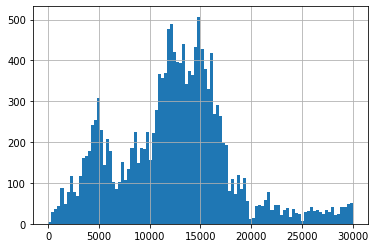

In [63]:
df['distance_to_center'].hist(bins=100, range = (0, 30000))
print(df['distance_to_center'].value_counts().head(10))
print(df['distance_to_center'].describe())

На распределении два пика: в одном поменьше значений, в другом побольше. Видимо, это связано с городами области - они небоольшие и до центра там расстояние 4-5 км, а второй более крупный пик - это Питер и его пригороды, где расстояние до центра уже от 9 до 16 км.
Еще большие значения связаны, по всей видимости с тем, что в объявлениях из удаленных пригородов в качестве центра все равно указывали Санкт-Петербург.

37434.0    56
21928.0    30
39946.0    29
37407.0    27
18732.0    26
47303.0    23
39140.0    23
21793.0    22
30073.0    21
44382.0    21
Name: distance_to_airport, dtype: int64
count    16831.000000
mean     28780.663062
std      12661.066130
min          0.000000
25%      18530.500000
50%      26709.000000
75%      37268.000000
max      84869.000000
Name: distance_to_airport, dtype: float64


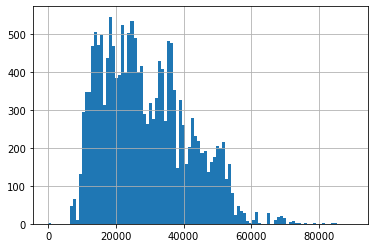

In [64]:
df['distance_to_airport'].hist(bins=100, range = (0, 90000))
print(df['distance_to_airport'].value_counts().head(10))
print(df['distance_to_airport'].describe())

Аэропорт находится, как правило, на некотором удалении от насленных пунктов, поэтому расстояние колеблется в данном столбце от 18 до 37 км.

441.0     60
456.0     40
173.0     36
392.0     33
2102.0    29
471.0     29
447.0     28
537.0     26
541.0     26
679.0     25
Name: distance_to_park, dtype: int64
count    7481.000000
mean      487.755380
std       338.035399
min         1.000000
25%       287.000000
50%       451.000000
75%       610.000000
max      3190.000000
Name: distance_to_park, dtype: float64


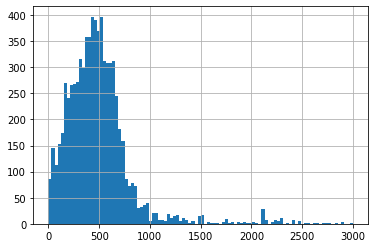

In [65]:
df['distance_to_park'].hist(bins=100, range = (0, 3000))
print(df['distance_to_park'].value_counts().head(10))
print(df['distance_to_park'].describe())

В тех объявлениях, где имеется такая информация, до ближайшего парка в большинстве случаев расстояние колеблется от 300 до 600 метров.

3    3964
1    3886
4    3674
2    3631
0    3346
5    1727
6    1512
Name: public_day_week, dtype: int64
count    21740.000000
mean         2.550276
std          1.782637
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: public_day_week, dtype: float64


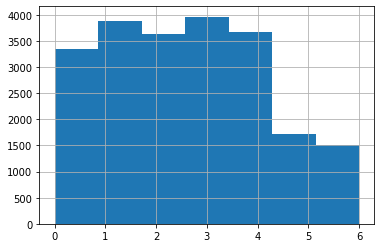

In [66]:
df['public_day_week'].hist(bins=7, range = (0, 6))
print(df['public_day_week'].value_counts().head(7))
print(df['public_day_week'].describe())

По будням явно публикуют больше объявлений.

2     2377
3     2353
11    2251
4     2215
10    2022
9     1887
6     1612
8     1608
7     1537
12    1370
1     1315
5     1193
Name: public_month, dtype: int64
count    21740.000000
mean         6.423735
std          3.465858
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: public_month, dtype: float64


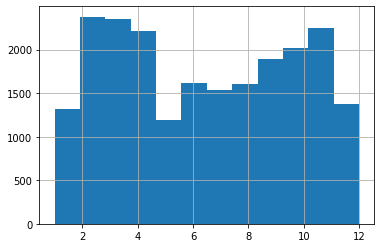

In [67]:
df['public_month'].hist(bins=12, range = (1, 12))
print(df['public_month'].value_counts().head(12))
print(df['public_month'].describe())

Меньше публикаций объявлений делают в мае, январе и декабре. Видимо, в декабре люди чаще уже подводят итоги года и думают о наступающих праздниках, в январе и мае - много праздничных дней. Больше всего публикаций в феврале и марте. 

**Вывод**

- гистограммы параметров показали хорошее распределение, аномальные значения присутствуют, но не влияют на общую картину;
- больше всего в продаже одно-, двух- и трехкомнатных квартир с площадью 31-32, 40-45 и около 60 квадратных метров, соотвественно;
- основной ценовой диапазон продаваемых квартир от 3,5 до 6,8 млн. рублей;
- чаще всего, продаваемые квартиры, находятся не на первом и не на последнем этажах, большее колчиество квартир продают на этажах со 2 по 5, самые популярные по этажности дома - пятиэтажки, много девятиэтажек;
- от продаваемых квартир до центра, в среднем, от 9 до 16 км, до аэропорта - от 18 до 37 км, до парка - 300-600 м.
- объявления чаще публикуют в будние дни, меньше всего объявлений было опубликовано в мае, январе и декабре, больше всего - в феврале и марте. 

**4.2. Скорость продажи квартир**

Изучим столбец days_exposition.

45.0    545
60.0    350
7.0     213
30.0    204
4.0     169
3.0     152
14.0    142
5.0     141
90.0    139
20.0    135
9.0     131
8.0     129
Name: days_exposition, dtype: int64
count    18758.000000
mean       184.799765
std        221.316790
min          1.000000
25%         44.000000
50%        101.000000
75%        238.000000
max       1580.000000
Name: days_exposition, dtype: float64
Медиана: 101.0
Среднее значение: 184.79976543341508


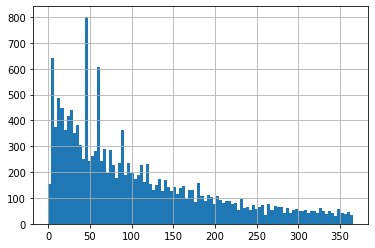

In [68]:
df['days_exposition'].hist(bins=100, range = (0, 365))
print(df['days_exposition'].value_counts().head(12))
print(df['days_exposition'].describe())
print('Медиана:', df['days_exposition'].median())
print('Среднее значение:', df['days_exposition'].mean())


**Вывод**

В основном квартиры продают в течение периода от 45 до 231 дня. 
Среднее значение - 185 дней, медианное - 101 день.
Быстрые продажи - менее 45 дней, долгие - более 231 дня. 

В целом, распределение представляет собой распределение Пуассона, но отчетливо видны пики в районе 7, 30, 45, 60 и 90 дней. Возможно, это связано с правилами публикации объявлений и через эти дни они уходят в архив автоматически. Но также квартиры и могут действительно продаваться в такой срок, хоть числа и очень "красивые".
Этот момент для того, чтобы сделать окончательный вывод о сроках продажи, нужно уточнить у коллег, которые сделали выгрузку данных.

**4.3. Какие факторы влияют на стоимость объекта**

Изучим, зависит ли цена от:
общей площади;
жилой площади;
площади кухни;
количества комнат;
этажа, на котором расположена квартира (первый, последний, другой);
даты размещения (день недели, месяц, год).

In [69]:
correlation = df[['last_price',\
           'total_area',\
           'kitchen_area',\
           'living_area'
           ]].corr()
correlation.style.background_gradient() #построим таблицу корреляции, где можно будет увидеть сразу все зависимости

,last_price,total_area,kitchen_area,living_area
last_price,1.000000,0.641610,0.518401,0.567351
total_area,0.641610,1.000000,0.609242,0.939949
kitchen_area,0.518401,0.609242,1.000000,0.429081
living_area,0.567351,0.939949,0.429081,1.000000


Как видно из таблицы, больше всего на цену квадратного метра жилья влияет площадь - общая, жилаяя и кухни. Коэффициенты корреляции 0.64, 0.57 и 0.52 соответственно. 

Теперь, чтобы следовать заданию, построим графики для каждого параметра. 

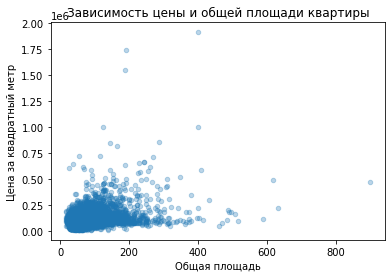

In [70]:
df.plot(kind = 'scatter', y = 'price_per_square', x = 'total_area', alpha = 0.3)
plt.title('Зависимость цены и общей площади квартиры')
plt.xlabel('Общая площадь')
plt.ylabel('Цена за квадратный метр')
plt.show()

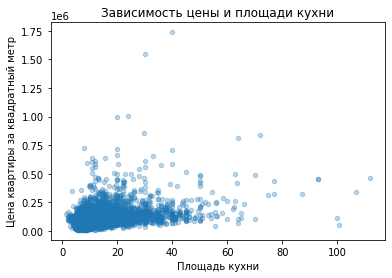

In [71]:
df.plot(kind = 'scatter', y = 'price_per_square', x = 'kitchen_area', alpha = 0.3)
plt.title('Зависимость цены и площади кухни')
plt.xlabel('Площадь кухни')
plt.ylabel('Цена квартиры за квадратный метр')
plt.show()

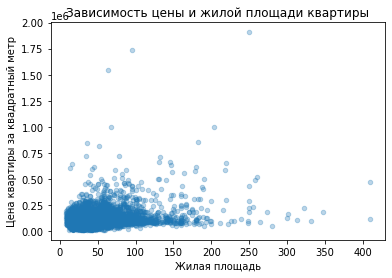

In [72]:
df.plot(kind = 'scatter', y = 'price_per_square', x = 'living_area', alpha = 0.3)
plt.title('Зависимость цены и жилой площади квартиры')
plt.xlabel('Жилая площадь')
plt.ylabel('Цена квартиры за квадратный метр')
plt.show()

Создадим функцию, которая будет считать среднюю цену и строить график по шаблону:

In [73]:
def last_price_influence(df, row): 
    data = df.pivot_table(index=row, values='last_price', aggfunc='mean')
    display(data)
    ax = data.plot(xticks=data.index, grid=True,figsize=(15,5))
    ylab = ax.set_ylabel('last_price')
    

,last_price
rooms,
0,3.022676e+06
1,3.810323e+06
2,5.590065e+06
3,8.118114e+06
4,1.328661e+07
5,2.338980e+07
6,3.041945e+07
7,5.168774e+07
8,5.022417e+07


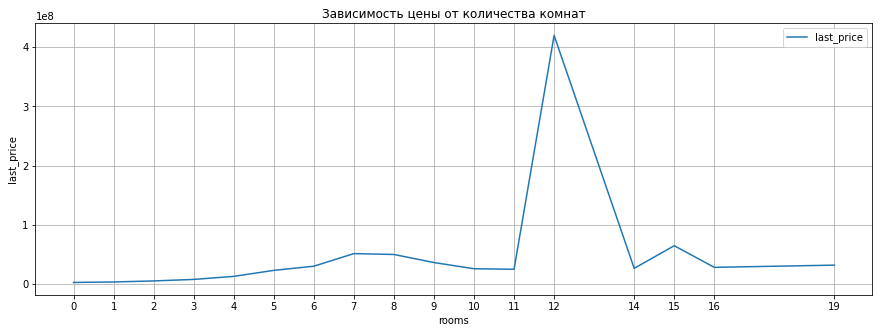

In [74]:
last_price_influence(df,'rooms')
plt.title('Зависимость цены от количества комнат');

Наблюдается скачок в цене 12-комнатной квартиры, это, по всей видимости, связано с ее особым статусом и каким-то люксовым сегментом, либо аномальное значение, которое не удалось отследить ранее. 
В целом, цены растут пропорционально увеличению комнат в квартире, что логично, поскольку увеличивается и площадь, но растут цены не линейно, а с замедлением. 

In [79]:
df.groupby('rooms')['last_price'].count()

rooms
0      180
1     7372
2     7281
3     5350
4     1083
5      292
6       99
7       53
8       12
9        7
10       3
11       2
12       1
14       2
15       1
16       1
19       1
Name: last_price, dtype: int64

In [1]:
last_price_influence(df.query('rooms < 8'),'rooms')
plt.title('Зависимость цены от количества комнат');

NameError: name 'last_price_influence' is not defined

,last_price
public_day_week,
0,6.571128e+06
1,6.374709e+06
2,6.472889e+06
3,6.716112e+06
4,6.256514e+06
5,6.899517e+06
6,6.308023e+06


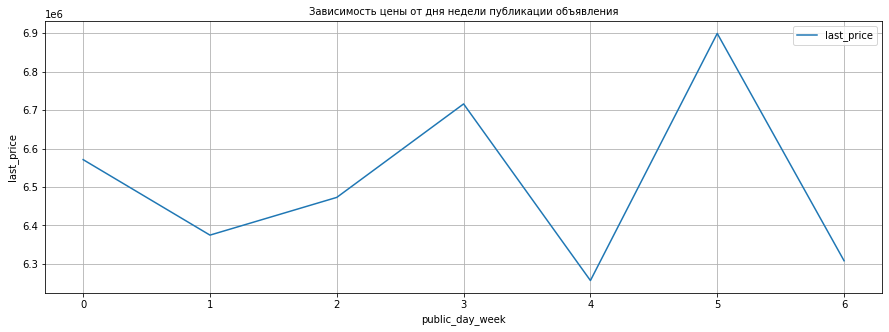

In [80]:
last_price_influence(df,'public_day_week')
plt.title('Зависимость цены от дня недели публикации объявления',fontsize=10);


Среднее значение цены квартры не сильно зависит от дня публикации объявления, примерно средние значения в одном ценовом диапазоне. 

,last_price
public_month,
1,6.618185e+06
2,6.528327e+06
3,6.342582e+06
4,6.766525e+06
5,6.376511e+06
6,6.359068e+06
7,6.397952e+06
8,6.291143e+06
9,6.821931e+06


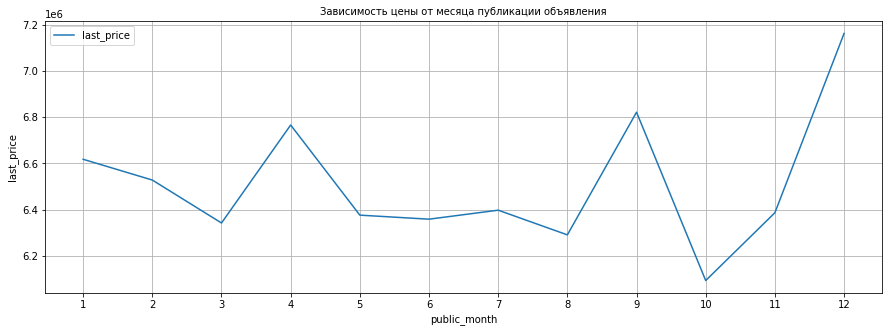

In [81]:
last_price_influence(df,'public_month')
plt.title('Зависимость цены от месяца публикации объявления',fontsize=10);

В декабре средняя стоимость жилья подрастает, возможно, это связано с новогодним ажиотажем на рынке. Самая низкая средняя цена квартиры в объявлениях, опубикованных в октябре. 

,last_price
public_year,
2014,1.189084e+07
2015,8.276270e+06
2016,6.709091e+06
2017,6.535354e+06
2018,5.966802e+06
2019,6.700162e+06


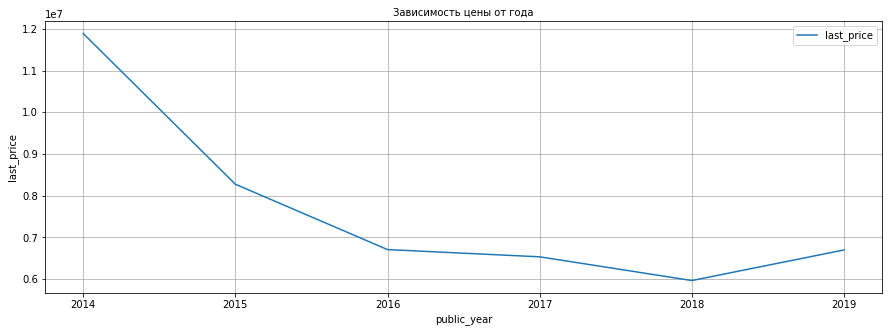

In [82]:
last_price_influence(df,'public_year')
plt.title('Зависимость цены от года',fontsize=10);


В 2014 году квартиры были дороже. 
После - цены немного снизились, что связано с экономически сложной ситуацией в нашей стране после 2014 года. 

,last_price
floor_type,
другой,4850000.0
первый,3950000.0
последний,4350000.0


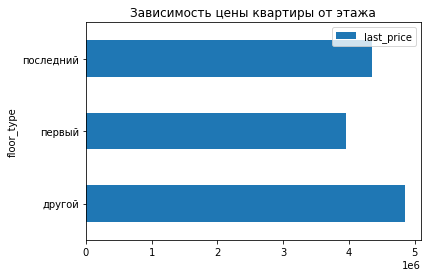

In [83]:
floor_types = df.pivot_table(index='floor_type', values='last_price', aggfunc='median')
display(floor_types)
floor_types.plot(kind='barh', title='Зависимость цены квартиры от этажа');


Квартиры на первом этаже дешевле всего, на последнем этаже также квартиры стоят чуть дешевле, чем, в среднем, на остальных этажах.

**Вывод**

На стоимость объекта, в первую очередь, влияет площадь, также удалось выявить зависимость от типа этажа - на первом квратиры стоят дешевле, от месяца публикации объявления - самые высокие цены в декабре. 
С 2014 года наблюдается общее падение уровня цен на недвижимость.

**4.4. Подсчет средней цены одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений**

Смотрим топ-10 городов по количеству упоминаний в датафрейме:

In [84]:
df['locality_name'].value_counts().head(10) 

санкт-петербург      14570
поселок мурино         491
поселок шушары         404
всеволожск             371
пушкин                 345
колпино                328
поселок парголово      301
гатчина                292
деревня кудрово        262
петергоф               197
Name: locality_name, dtype: int64

Посчитаем процентное соотношение:

In [85]:
(df['locality_name'].value_counts() / df.shape[0] * 100).head(10).round(2)

санкт-петербург      67.02
поселок мурино        2.26
поселок шушары        1.86
всеволожск            1.71
пушкин                1.59
колпино               1.51
поселок парголово     1.38
гатчина               1.34
деревня кудрово       1.21
петергоф              0.91
Name: locality_name, dtype: float64

In [86]:
top_localities = df.pivot_table(index = 'locality_name', values = 'price_per_square', aggfunc=['count', 'mean'])
top_localities.columns = ['count', 'mean']
top_localities = top_localities.sort_values('count', ascending = False).head(10)
top_localities

,count,mean
locality_name,,
санкт-петербург,14570,114168.603592
поселок мурино,491,86277.778976
поселок шушары,404,78886.398893
всеволожск,371,68880.131023
пушкин,345,103428.483885
колпино,328,75344.096345
поселок парголово,301,90442.587023
гатчина,292,68627.363919
деревня кудрово,262,92702.184418


Выделим населенные пункты с самой выской и самой низкой средней стоимостью квадратного метра: 

In [87]:
#самая высокая стоимость
top_localities[top_localities['mean']==top_localities['mean'].max()].round(2)

,count,mean
locality_name,,
санкт-петербург,14570,114168.6


In [88]:
#самая низкая стоимость
top_localities[top_localities['mean']==top_localities['mean'].min()].round(2)

,count,mean
locality_name,,
гатчина,292,68627.36


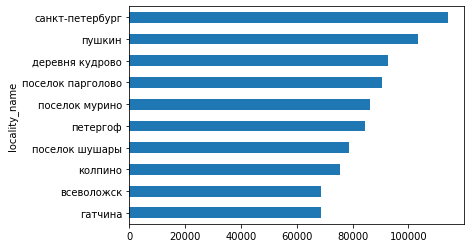

In [89]:
top_localities['mean'].sort_values().plot(kind='barh');

**Вывод**

Больше всего объявлений о продаже квартир в Санкт-Петербурге, он идет со значительным отрывом (14570 объявлений), на втором месте - Мурино (491 объявление).
Самая высокая средняя стоимость квадратного метра из 10 самых популярных населенных пунктов также в Санкт-Петербурге (114168.6 рублей), чуть отстает Пушкин (103428.48), самая низкая стоимость  - в Гатчине (68627.36 рублей).

**4.5. Средняя цена каждого километра до центра**

In [90]:
df_spb_avg = df.query('locality_name == "санкт-петербург"').pivot_table(index = 'distance_to_center_km', values = 'price_per_square', aggfunc = 'mean')
display(df_spb_avg) 

,price_per_square
distance_to_center_km,
0.0,250756.186857
1.0,171518.400217
2.0,159597.417206
3.0,120248.387909
4.0,132100.089949
5.0,137794.233864
6.0,148633.324520
7.0,155580.714898
8.0,125088.293740


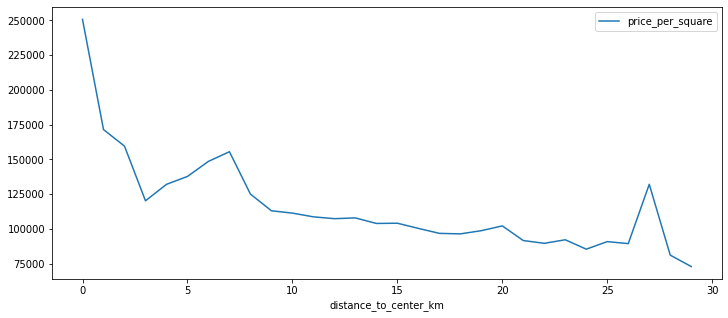

In [91]:
df_spb_avg.plot(figsize=(12,5));

In [92]:
df_spb = df.query('locality_name == "санкт-петербург"').pivot_table(index = 'distance_to_center_km', values = 'last_price', aggfunc = 'mean')
display(df_spb/1000000) #отобразим стоимость в млн.руб

,last_price
distance_to_center_km,
0.0,32.592755
1.0,21.838773
2.0,18.096195
3.0,11.009465
4.0,13.040109
5.0,13.839633
6.0,14.835943
7.0,14.379874
8.0,10.070305


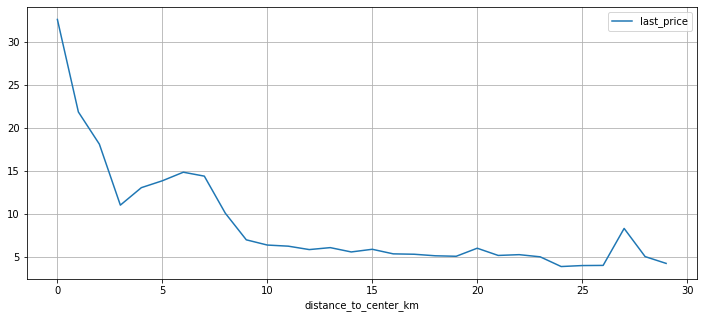

In [93]:
(df_spb/1000000).plot(grid=True,figsize=(12,5));

**Вывод**

Цены на квартиру очень зависят от удаленности от центра. Цены резко падают после 7 км, возможно там проходят границы города, ну или основной части с более хорошими районами. 
Есть некоторый всплеск в районе 27 км, вероятно, он связан с каким-то очень хорошим и престижным местоположением. При необходимости можно обратиться к коллегами и детальнее проанализировать связанную с этим аномалию.    

### Общий вывод

Мы проанализировали данные сервиса Яндекс.Недвижимость с архивом объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет.

Всего в архиве было 23698 строк и 22 столбца с параметрами квартир. 

Данные не были идеальными, поэтому мы осуществили предобработку данных.

**Выводы по итогам предобработки данных:** 
- изменили названия нескольких столбцов, 
- заполнили пропуски в столбце с указанием количества балконов на 0, 
- изменили формат столбца balcony на целочисленный, а столбца first_day_exposition - на формат даты,
- удалили строки, в которых не указан населенный пункт, где расположено жилье,
- рассмотрели столбец с указанием высотоы потолов и заменили аномальные значения,
- рассмотрели аномальные значения в столбцах с общей и жилой площадью, удалили аномальные значения.

**Выводы по основным параметрам объектов:** 

Далее изучили основные параметры объектов (общая и жилая площадь, цена объекта, количество комнат, этаж, расстояние до центра, до парка, до аэропорта). 
В результате, можно сделать следюущие выводы:
- гистограммы параметров показали хорошее распределение, аномальные значения присутствуют, но не влияют на общую картину;
- больше всего в продаже одно-, двух- и трехкомнатных квартир с площадью 31-32, 40-45 и около 60 квадратных метров, соотвественно;
- основной ценовой диапазон продаваемых квартир от 3,5 до 6,8 млн. рублей;
- чаще всего, продаваемые квартиры, находятся не на первом и не на последнем этажах, большее колчиество квартир продают на этажах со 2 по 5, самые популярные по этажности дома - пятиэтажки, много девятиэтажек;
- от продаваемых квартир до центра, в среднем, от 9 до 16 км, до аэропорта - от 18 до 37 км, до парка - 300-600 м.
- объявления чаще публикуют в будние дни, меньше всего объявлений было опубликовано в мае, январе и декабре, больше всего - в феврале и марте. 

**Выводы по скорости продажи квартир:** 

Если говорить о скорости продажи квартир, то, в основном, квартиры продают в течение периода от 45 до 231 дня. 
Среднее значение - 185 дней, медианное - 101 день. Быстрые продажи - менее 45 дней, долгие - более 231 дня. 
В целом, распределение представляет собой распределение Пуассона, однако отчетливо видны пики в районе 7, 30, 45, 60 и 90 дней. Возможно, это связано с правилами публикации объявлений и через эти дни они уходят в архив автоматически. Но также квартиры и могут действительно продаваться в такой срок, хоть числа и очень "красивые". Эти данные необходимо уточнить у коллег, которые предоставили выгрузку.

**Выводы по влиянию основных параметров на стоимость квартиры:** 

Изучили влияние параметров. Можно сказать, что общая и жилая площадь, а также площадь кухни больше всего влияют на стоимость жилья, также удалось обнаружить влияние месяца публикации объявления - самая высокая средняя стоимость квратир в декабре, самая низкая в октябре, типа этажа - в среднем на первом этаже квартиры стоят дешевле.

Местораположение квартиры очень сильно влияет на цену и количество объявлений.
Больше всего объявлений о продаже квартир в Санкт-Петербурге, он идет со значительным отрывом (14570 объявлений), на втором месте - Мурино (491 объявление).
Самая высокая средняя стоимость квадратного метра из 10 самых популярных населенных пунктов также в Санкт-Петербурге (114168.6 рублей), чуть отстает Пушкин (103428.48), самая низкая стоимость  - в Гатчине (68627.36 рублей).

Цены на квартиру в самом Санкт-Петербурге очень зависят от удаленности от центра. Цены резко падают после 7 км, возможно там проходят границы города, ну или основной части с более хорошими районами. 
Есть некоторый всплеск в районе 27 км, вероятно, он связан с каким-то очень хорошим и престижным местоположением. При необходимости можно обратиться к коллегами и детальнее проанализировать связанную с этим аномалию.    

